In [ ]:
# скачиваем файл
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1VPkoWfiIvZl4HGp49BUaVEEblVIGYh91' -O heart.csv

In [ ]:
# устанавливаем нужную версию библиотеки sklearn, чтобы ответы совпадали
!pip install scikit-learn==0.22.1

In [1]:
import numpy as np
import pandas as pd

В этом задании вы будете работать с [данными о пациентах, у части которых есть заболевание сердца](https://www.kaggle.com/ronitf/heart-disease-uci). Вам нужно построить модель, классифицирующую пациентов на больных этим заболеванием и тех, у кого его нет, а также проанализировать результаты.

In [2]:
data = pd.read_csv('heart.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


1. Какой процент пациентов из представленных в данных имеет заболевание сердца (`'target' = 1`)?

In [3]:
target_1 = data[data['target'] == 1].shape[0]
data_shape = data.shape[0]
f'Процент людей с заболеванием = {(target_1 / data_shape * 100):.2f}% (выборка сбалансированная)'

'Процент людей с заболеванием = 54.46% (выборка сбалансированная)'

Разделим данную выборку на обучающую и тестовую части в отношении 3:1.

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    data.drop('target', axis=1),
    data['target'],
    test_size=0.25,
    random_state=13
)
X_train.shape, X_test.shape

((227, 13), (76, 13))

2. Обучите линейный классификатор из `sklearn` (`sklearn.linear_model.SGDClassifier`) с максимальным числом итераций `max_iter=1000`, постоянным значением шага градиентного спуска (`learning_rate='constant'`), равным `eta0=0.1`. В качестве сида поставьте `random_state=13`. Параметр регуляризации отключите: `alpha=0`. Класс `sklearn.linear_model.SGDClassifier` объединяет в себе разные линейные модели - чтобы получить логистическую регрессию, зафиксируйте параметр `loss='log'`.

   Подробнее о параметрах можно почитать в [документации](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html).

   Какое значение свободного коэффициента у полученного линейного классификатора?

In [5]:
from sklearn.linear_model import SGDClassifier

classifier = SGDClassifier(
    loss='log',
    max_iter=1000,
    learning_rate='constant',
    eta0=0.1,
    random_state=13,
    alpha=0
)
classifier.fit(X_train, y_train)
f'w_0 = {classifier.intercept_}'

'w_0 = [-1.15927929]'

3. Какое значение L2-нормы вектора весов (без учета свободного коэффициента) у полученного линейного классификатора?

_Напоминание. L2-норма вектора $v = (v_1, \ldots, v_n)$ — это корень из суммы квадратов его элементов:_

$$
\|v\|_2 = \sqrt{\sum\limits_{i=1}^nv_i^2}
$$

In [6]:
def v_2(coefs: np.ndarray) -> float:
    coefs = sum(map(lambda x: x ** 2, coefs))
    return math.sqrt(coefs)

In [7]:
import math

v_norm = v_2(classifier.coef_[0])
f'||v||_2 = {v_norm}'

'||v||_2 = 175.67735435821564'

4. Найдите долю правильных ответов классификатора на тестовой части выборки **(в процентах)**. Ответ округлите до двух знаков после запятой. Например, если значение доли правильных ответов будет равно 0.1234, то ответом будет 12.34 - ведь это 12.34%.

In [8]:
from sklearn.metrics import accuracy_score

y_pred = classifier.predict(X_test)
acc_score = accuracy_score(y_test, y_pred) 
f'accuracy score = {(acc_score * 100):.2f}%'

'accuracy score = 61.84%'

5. В задаче классификации, как и в задаче регрессии, для оптимизации линейных моделей можно применять регуляризацию. Этот метод реализован и в `sklearn.linear_model.SGDClassifier` - параметр регуляризации обозначается параметром `alpha`. За тип регуляризации (L1, L2 или обе сразу) отвечает параметр `penalty`. 

   Обучите классификатор заново с параметром регуляризации `alpha=0.1` и типом регуляризации `penalty='l1'`. Оставьте максимальное число итераций, равное `max_iter=1000` и сид `random_state=13`. Также вместо постоянного значения шага градиентного спуска используйте оптимальное (`learning_rate='optimal'`), которое, кстати, зависит от `alpha` (о том, как именно он вычисляется и какие еще параметры можно выбрать, можно подробнее прочитать в [документации](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html)). В данном случае значение начального шага градиентного спуска `eta0` никак не участвует в обучении.
   
   Отличается ли качество полученного классификатора от качества первого? Какая доля правильных ответов получается теперь на тестовой выборке? Выразите ее **в процентах**, ответ округлите до двух знаков после запятой. Например, если значение доли правильных ответов будет равно 0.1234, то ответом будет 12.34 - ведь это 12.34%.

In [9]:
classifier_l1 = SGDClassifier(
    loss='log',
    alpha=0.1,
    penalty='l1',
    max_iter=1000,
    random_state=13,
    learning_rate='optimal'
)
classifier_l1.fit(X_train, y_train)
y_pred = classifier_l1.predict(X_test)

acc_score = accuracy_score(y_test, y_pred)
f'l1 accuracy score = {(acc_score * 100):.2f}% (точность улучшилась)'

'l1 accuracy score = 76.32% (точность улучшилась)'

6. Найдите L2-норму вектора весов для полученного классификатора (заметьте, как на нее повлияла регуляризация). Ответ округлите до двух знаков после запятой.

    Заметьте, что вектор стал более разреженным, и в нем появились нулевые элементы - это результат действия L1-регуляризации.

In [10]:
classifier_l1.coef_

array([[-0.87424016,  0.        ,  9.26085004, -0.45773776, -0.01501012,
         0.        ,  0.        ,  0.74467772,  0.        , -0.25903021,
         0.        , -4.1192229 , -2.1071261 ]])

In [11]:
v_norm = v_2(classifier_l1.coef_[0])
f'||v||_2 = {v_norm}'

'||v||_2 = 10.429142228977849'

7. Наконец, проверьте, как полученные классификаторы предсказывают не классы, а вероятности классов - так как мы работаем с логистической регрессией, это можно сделать. Посмотрите на вероятности, которые выдает первый классификатор (обученный с постоянным шагом градиентного спуска и без регуляризации) на тестовой части выборки. В этом вам поможет метод `predict_proba`. Результатом его работы будет список размера $N\times 2$, где $N$ - это число объектов. В каждом столбце списка находятся вероятности соответствующего класса для объектов. Поэтому если вам нужен положительный класс, вас интересует последний столбец.

    Постройте график ROC-кривой и найдите значение AUC-ROC.

In [12]:
def draw_roc(y_test, y_pred_prob) -> None:
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    
    plt.figure(figsize=(11, 6.5))
    plt.plot(fpr, tpr, 'r')
    plt.title('ROC-curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.show()

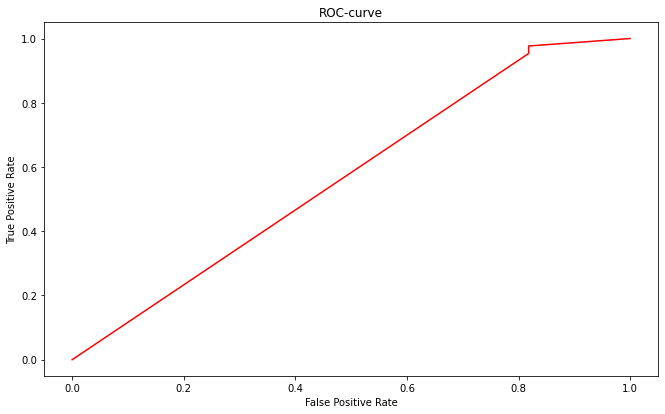

'AUC-ROC = 0.56977'

In [13]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

pred_prob = classifier.predict_proba(X_test)
y_pred_prob = pred_prob[:, 1]
draw_roc(y_test, y_pred_prob)

auc_roc = roc_auc_score(y_test, y_pred_prob)
f'AUC-ROC = {auc_roc:.5f}'

8. Посмотрите на вероятности, которые выдает второй классификатор (обученный с оптимальным шагом градиентного спуска и с регуляризацией) на тестовой части выборки. Что вы наблюдаете - как отличаются эти вероятности от вероятностей первого классификатора?

   Посчитайте значение AUC-ROC второго классификатора. Ответ округлите до двух знаков после запятой.

In [14]:
pred_prob = classifier_l1.predict_proba(X_test)
pred_prob_head = pred_prob[:5, :]
pred_prob_head

array([[1.00000000e+00, 9.93187655e-11],
       [0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       [3.55271368e-15, 1.00000000e+00],
       [2.00988718e-01, 7.99011282e-01]])

В отличии от первого классификатора вероятности стали принимать значения на всем промежутке от [0, 1]. Вероятности первого классификатора принимают только два значения: 1 либо 0.

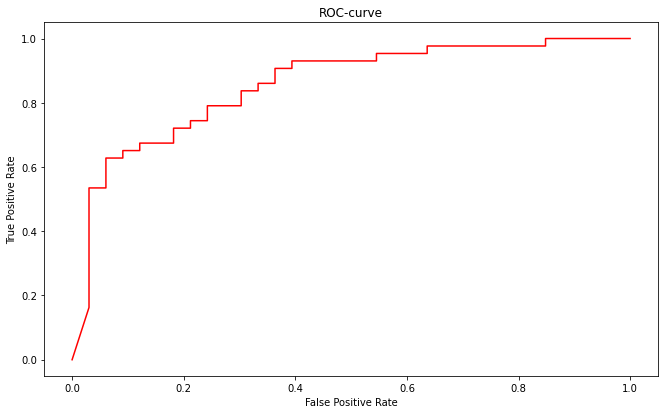

In [15]:
# draw roc_curve classififer_l1
y_pred_prob = pred_prob[:, 1]
draw_roc(y_test, y_pred_prob)

In [16]:
auc_roc = roc_auc_score(y_test, y_pred_prob)
f'AUC-ROC = {auc_roc:.2f}'

'AUC-ROC = 0.86'

9. Какой признак является самым важным по мнению лучшей модели (имеет наибольший по модулю коэффициент) для принятия решения?

In [17]:
coefs = classifier_l1.coef_[0]
coefs = list(map(abs, coefs))
most_important_column = data.columns[np.argmax(coefs)] 
f'Самый важный признак, по мнению второго классификатора - {most_important_column}'

'Самый важный признак, по мнению второго классификатора - cp'